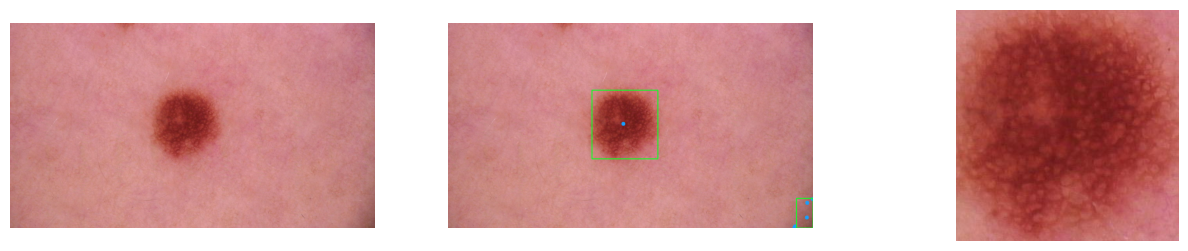

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('D:/melanoma-data/siim-isic-melanoma-classification/jpeg/train/ISIC_0098198.jpg')
original = cv2.imread('D:/melanoma-data/siim-isic-melanoma-classification/jpeg/train/ISIC_0098198.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
ROI = None
maxx = 0
for c in cnts:
    # Obtain bounding rectangle to get measurements
    x,y,w,h = cv2.boundingRect(c)

    # Find centroid
    M = cv2.moments(c)
    cX = int(M["m10"] / (M["m00"]+0.00001))
    cY = int(M["m01"] / (M["m00"]+0.00001))

    # Crop and save ROI
    if w * h > maxx:
        maxx = w * h
        cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12), 4)
        cv2.circle(image, (cX, cY), 10, (320, 159, 22), -1) 
        ROI = original[y:y+h, x:x+w]
        
    # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    # ROI_number += 1

    # Draw the contour and center of the shape on the image
    # cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12), 4)
    # cv2.circle(image, (cX, cY), 10, (320, 159, 22), -1) 

# ROI = cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB)
images = [original, image,ROI]
plt.figure(figsize =(16,3))
for i in range(3):
    # image = cv2.resize(image, (500,500))
    # image = hair_remove(image)
    
    plt.subplot(1,3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    # plt.imshow(image)
    # plt.imshow(ROI)

    plt.axis("off")
# plt.imshow(image)
# plt.imshow(ROI)